#### Upload api key from downloads everytime before restart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 40.6MB/s]
100% 1.06G/1.06G [00:30<00:00, 38.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten

In [6]:
!ls test/cats

cat.10000.jpg  cat.12340.jpg  cat.328.jpg   cat.5509.jpg  cat.7729.jpg
cat.10001.jpg  cat.12346.jpg  cat.3290.jpg  cat.5511.jpg  cat.772.jpg
cat.10007.jpg  cat.12350.jpg  cat.3293.jpg  cat.5518.jpg  cat.7738.jpg
cat.10017.jpg  cat.12352.jpg  cat.3294.jpg  cat.5524.jpg  cat.7743.jpg
cat.10021.jpg  cat.12356.jpg  cat.3296.jpg  cat.5532.jpg  cat.7749.jpg
cat.10026.jpg  cat.12361.jpg  cat.3299.jpg  cat.5537.jpg  cat.7754.jpg
cat.10030.jpg  cat.1236.jpg   cat.3315.jpg  cat.5543.jpg  cat.7759.jpg
cat.10033.jpg  cat.12373.jpg  cat.3318.jpg  cat.5552.jpg  cat.776.jpg
cat.10035.jpg  cat.12374.jpg  cat.3327.jpg  cat.5557.jpg  cat.7775.jpg
cat.10036.jpg  cat.12376.jpg  cat.3329.jpg  cat.5559.jpg  cat.7784.jpg
cat.10046.jpg  cat.12378.jpg  cat.3332.jpg  cat.5561.jpg  cat.7791.jpg
cat.10048.jpg  cat.12388.jpg  cat.3338.jpg  cat.5563.jpg  cat.7793.jpg
cat.10052.jpg  cat.12391.jpg  cat.3342.jpg  cat.5565.jpg  cat.7798.jpg
cat.10057.jpg  cat.12398.jpg  cat.3347.jpg  cat.5566.jpg  cat.7807.jpg
cat.1006

### VISUALIZATION

In [7]:
# Create class names
import pathlib
data_dir = pathlib.Path("train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [8]:
print(class_names)

['cats' 'dogs']


#### Visualizing with Matplotlib

In [9]:
import random
import os
import matplotlib.image as mpimg

#Going to select image randomly
def view_random_image(target_dir, target_class):
  #Set the target directory, we will view images from here
  target_folder = target_dir + target_class

  #Get the random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #Read the image and plot using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0]) #It is going to be returned back as a list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"The shape of the image is: {img.shape}") #Show the shape of the image

  return img

The shape of the image is: (500, 344, 3)


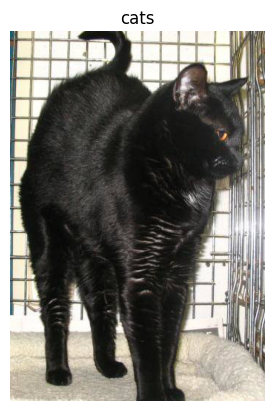

In [10]:
img_cat = view_random_image(target_dir="train/",
                        target_class='cats')

The shape of the image is: (359, 223, 3)


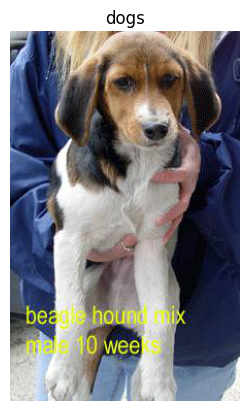

In [11]:
img_dog = view_random_image(target_dir="train/",
                            target_class='dogs')

In [12]:
img_dog.shape

(359, 223, 3)

In [13]:
img_cat.shape

(500, 344, 3)

### Preprocessing Our Image

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (we want to get all the data between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255.) #Rescaled Images
valid_datagen = ImageDataGenerator(rescale=1/255.) #Rescaled Images

# Setup paths to our data
train_dir = "/content/train"
test_dir = "/content/test"

# Import data from directory and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
len(train_data) #turned into batches

625

### Build the first CNN Model

In [16]:
#Build the CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    
    #Another layer
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
625/625 [==============================] - 148s 216ms/step - loss: 0.5993 - accuracy: 0.6599 - val_loss: 0.5675 - val_accuracy: 0.7148
Epoch 2/5
625/625 [==============================] - 135s 217ms/step - loss: 0.5170 - accuracy: 0.7429 - val_loss: 0.4916 - val_accuracy: 0.7616
Epoch 3/5
625/625 [==============================] - 110s 176ms/step - loss: 0.4444 - accuracy: 0.7930 - val_loss: 0.4949 - val_accuracy: 0.7664
Epoch 4/5
625/625 [==============================] - 147s 235ms/step - loss: 0.3799 - accuracy: 0.8280 - val_loss: 0.5037 - val_accuracy: 0.7636
Epoch 5/5
625/625 [==============================] - 130s 208ms/step - loss: 0.3152 - accuracy: 0.8628 - val_loss: 0.5236 - val_accuracy: 0.7762


### Plotting the losses

In [17]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for

  #Plpot accuracy
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("LOSS")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("ACCURACY")
  plt.xlabel("epochs")
  plt.legend()


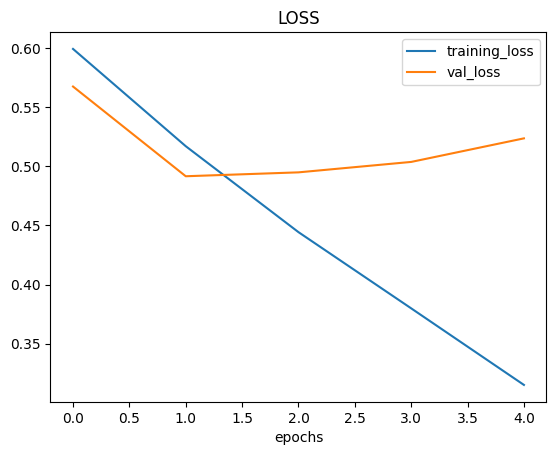

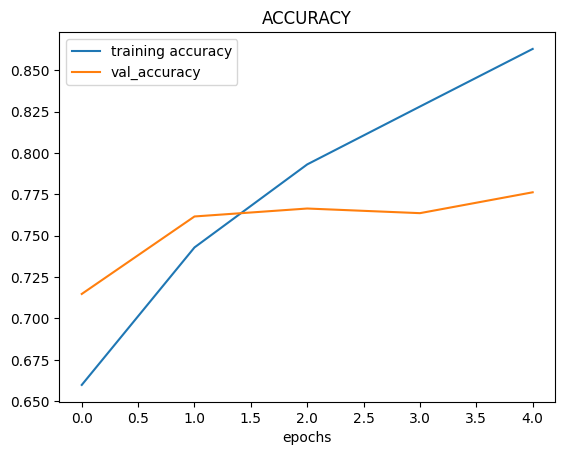

In [18]:
plot_loss_curves(history_1)

### Function to prepare image to pass as prediction

In [19]:
# Creating a helper function to import image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from the filename and turns it into 
  tensor and reshapes it into (img_shape, img_shape, color_channels)
  """
  #Reads in the image
  img = tf.io.read_file(filename) #read and outputs the entire contents of the filename

  #Decode the read file into your tensor
  img = tf.image.decode_image(img) #Detects the format of the image and performs the appropriate operation to convert the image
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #And the real images have data between 0 and 255
  #We need to scale the images between 0 and 1
  img = img/255.

  return img

In [20]:
dog = load_and_prep_image("dog_1.jpg")
dog

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.14866874, 0.14866874, 0.14866874],
        [0.14657627, 0.14657627, 0.14657627],
        [0.15073396, 0.15073396, 0.15073396],
        ...,
        [0.24776113, 0.25560427, 0.2516827 ],
        [0.24921492, 0.24921492, 0.24921492],
        [0.24711771, 0.24711771, 0.24711771]],

       [[0.15650386, 0.15650386, 0.15650386],
        [0.14567243, 0.14567243, 0.14567243],
        [0.14703494, 0.14703494, 0.14703494],
        ...,
        [0.2564021 , 0.2564021 , 0.2564021 ],
        [0.2583206 , 0.2583206 , 0.2583206 ],
        [0.24509   , 0.24509   , 0.24509   ]],

       [[0.15028329, 0.15028329, 0.15028329],
        [0.1551208 , 0.1551208 , 0.1551208 ],
        [0.14900924, 0.14900924, 0.14900924],
        ...,
        [0.25018257, 0.25018257, 0.25018257],
        [0.24813688, 0.25598   , 0.25205845],
        [0.2661066 , 0.27394974, 0.27002817]],

       ...,

       [[0.33935627, 0.33151314, 0.3354347 ],
        [0.34

#### Creating a helper function to know what the class of the predicted image is and is it actually correct

In [21]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with
   model and plots the image with predicted class as the title
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 285ms/step


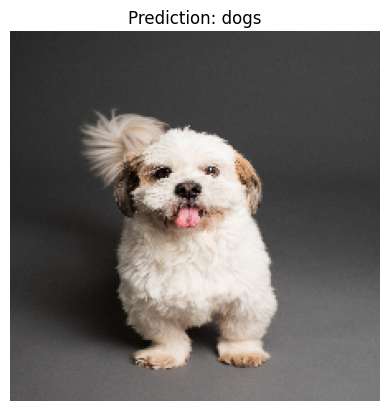

In [22]:
pred_and_plot(model_1, "dog_1.jpg")

### Saving this model

In [23]:
model_1.save("Dogs_vs_Cats.h5")
print("Model saved!")

Model saved!


# Data Augmentation - For better results and reduce overfitting

In [25]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.5,
                                             zoom_range=0.2,
                                             width_shift_range=0.5,
                                             height_shift_range=0.5,
                                             horizontal_flip=True,
                                             vertical_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

#### Lets write some code to visualise data augmentation

In [33]:
# Import data and augment it from directory
print("Augment training data - ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

# Create non augmented train data batches
print("Non Augmented training Data - ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

print("Non Augmented test Data - ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augment training data - 
Found 20000 images belonging to 2 classes.
Non Augmented training Data - 
Found 20000 images belonging to 2 classes.
Non Augmented test Data - 
Found 5000 images belonging to 2 classes.


#### Lets visualise some augmented data

In [34]:
#Sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number 31


(-0.5, 223.5, 223.5, -0.5)

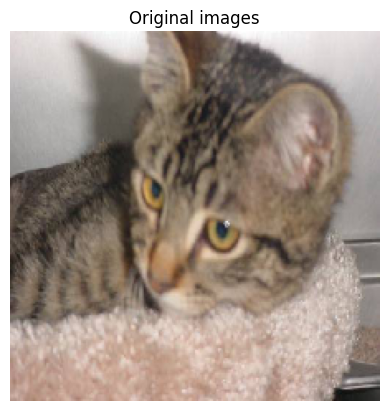

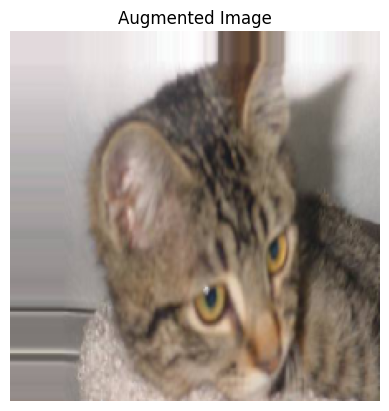

In [32]:
##Show original images and then the augmented images

import random
random_number = random.randint(0,31)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original images")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)